DATA SCIENCE INTERVIEW ASSIGNMENT 

SALARY PREDICTION SYSTEM

In [1]:
# IMPORTING REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# LOADING THE DATASET 

train_features_df = pd.read_csv('train_features.csv')

test_features_df = pd.read_csv('test_features.csv')

train_salaries_df = pd.read_csv('train_salaries.csv')

In [3]:
# RENAMING THE COLUMN HEADERS

train_features_df.rename(columns = {'jobId':'Job ID', 'companyId':'Company ID', 'jobType':'Job Type', 'degree':'Degree', 'major':'Major', 'industry':'Industry', 'yearsExperience':'Experience in Years', 'milesFromMetropolis':'Miles from Metropolis'}, inplace = True)

test_features_df.rename(columns = {'jobId':'Job ID', 'companyId':'Company ID', 'jobType':'Job Type', 'degree':'Degree', 'major':'Major', 'industry':'Industry', 'yearsExperience':'Experience in Years', 'milesFromMetropolis':'Miles from Metropolis'}, inplace = True)

train_salaries_df.rename(columns = {'jobId':'Job ID', 'salary':'Salary'}, inplace = True)

In [4]:
train_features_df.head()

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience in Years,Miles from Metropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
test_features_df.head()

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience in Years,Miles from Metropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
train_salaries_df.head()

,Job ID,Salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [7]:
# CHECK SHAPE OF DATASET 

print(train_features_df.shape)
print(test_features_df.shape)
print(train_salaries_df.shape)

(1000000, 8)
(1000000, 8)
(1000000, 2)


In [8]:
# TO CHECK THE DATA TYPE OF COLUMNS IN THE DATA FRAME 

# ALSO CHECK IF THERE ARE ANY MISSING VALUES OR NOT

train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
Job ID                   1000000 non-null object
Company ID               1000000 non-null object
Job Type                 1000000 non-null object
Degree                   1000000 non-null object
Major                    1000000 non-null object
Industry                 1000000 non-null object
Experience in Years      1000000 non-null int64
Miles from Metropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
Job ID                   1000000 non-null object
Company ID               1000000 non-null object
Job Type                 1000000 non-null object
Degree                   1000000 non-null object
Major                    1000000 non-null object
Industry                 1000000 non-null object
Experience in Years      1000000 non-null int64
Miles from Metropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [10]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
Job ID    1000000 non-null object
Salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [11]:
# MERGE TRAIN FEATURES & TRAIN SALARIES DATASET 

train_merged = pd.merge(train_features_df, train_salaries_df, on = 'Job ID', how = 'inner')
train_merged.head()

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience in Years,Miles from Metropolis,Salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [12]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
Job ID                   1000000 non-null object
Company ID               1000000 non-null object
Job Type                 1000000 non-null object
Degree                   1000000 non-null object
Major                    1000000 non-null object
Industry                 1000000 non-null object
Experience in Years      1000000 non-null int64
Miles from Metropolis    1000000 non-null int64
Salary                   1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [13]:
# CHECK FOR UNIQUE VALUES IN SALARY 

train_merged.Salary.unique()

array([130, 101, 137, 142, 163, 113, 178,  73,  31, 104, 102, 144,  79,
       193,  47, 172, 126, 122,  95,  32,  68, 105,  76, 202, 131, 158,
        82, 159, 132, 165, 100, 164, 115, 206, 183, 114, 141, 119,  91,
       106, 112, 116, 148, 173,  70,  88,  96, 118, 140, 161, 111,  55,
       217,  62,  86,  80, 168, 133, 129,  89, 135,  94, 169,  90, 110,
       179, 176,  84, 162, 107, 125, 205,  72, 127,  99, 145, 170, 180,
       117, 207, 151, 108, 121, 166,  49,  75, 194,  52, 154, 146, 171,
       139, 174,  57,  78, 152, 155,  65, 123,  48,  42,  50, 156, 128,
        83,  69,  85,  59, 136,  93,  67, 138, 134,  97, 160, 195,  63,
       153,  74, 120, 187,  92, 223,  51,  77, 103, 150,  45, 143,  34,
       124, 109, 190,  98,  58, 149, 157, 147,  71,  64, 167,  46, 184,
        33,  87, 188,  60,  23, 177,  61, 196, 175,  54,  38,  66, 185,
       181, 197, 248,  81, 189,  56, 204, 214,  53,  39, 218, 199, 192,
       240, 210, 186, 201, 225,  44,  35,  29,  36,  37, 200, 19

In [14]:
# CHECK LENGTH OF '0' VALUES IN THE DATA FRAME

len(train_merged[train_merged['Salary'] == 0])

5

In [15]:
# REMOVING THE '0' VALUES IN THE DATA FRAME

train_merged = train_merged[train_merged['Salary'] != 0]

In [16]:
print(train_merged.shape)

(999995, 9)


In [17]:
# TO CHECK WHETHER THE DATA FRAME IS PROPERLY ALIGNED OR NOT 

train_merged.reset_index(drop = True).head()

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience in Years,Miles from Metropolis,Salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [18]:
# CHECK FOR NUMBER OF UNIQUE VALUES IN EACH COLUMN OF THE DATA FRAME

train_merged.nunique()

Job ID                   999995
Company ID                   63
Job Type                      8
Degree                        5
Major                         9
Industry                      7
Experience in Years          25
Miles from Metropolis       100
Salary                      279
dtype: int64

In [19]:
# LASTLY CHECK IF THERE ARE ANY DUPLICATE VALUES 

train_merged.duplicated().any()

False

DATA ANALYSIS

In [20]:
# CHECK IF THE SALARY DISTRIBUTION IS SYMMETRIC OR SKEWED

print('Salary Skewness:', train_merged['Salary'].skew())
if -0.5 <= train_merged['Salary'].skew() <= 0.5:
    print("Salary distribution is symmetric")
else:
    print("Salary distribution is skewed")

Salary Skewness: 0.34652727907668734
Salary distribution is symmetric


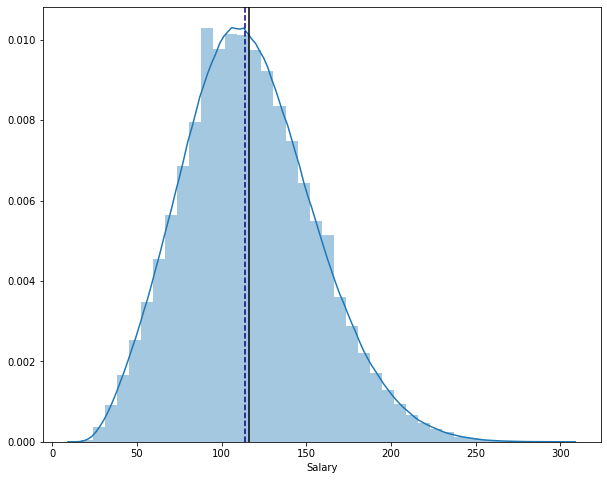

In [21]:
# DISTRIBUTION PLOT

plt.figure(figsize = (10,8))
sns.distplot(train_merged['Salary'], bins = 40, kde = True, norm_hist = True)
plt.axvline(train_merged['Salary'].mean(), color='black')
plt.axvline(train_merged['Salary'].median(), color='darkblue', linestyle='--')
plt.show()

In [22]:
# PRINT VALUE OF MEAN AND MEDIAN 

print("The black line in distribution plot is the mean salary:", train_merged['Salary'].mean())
print("The dark blue dotted line in distribution plot is the median salary:", train_merged['Salary'].median())

The black line in distribution plot is the mean salary: 116.06239831199156
The dark blue dotted line in distribution plot is the median salary: 114.0


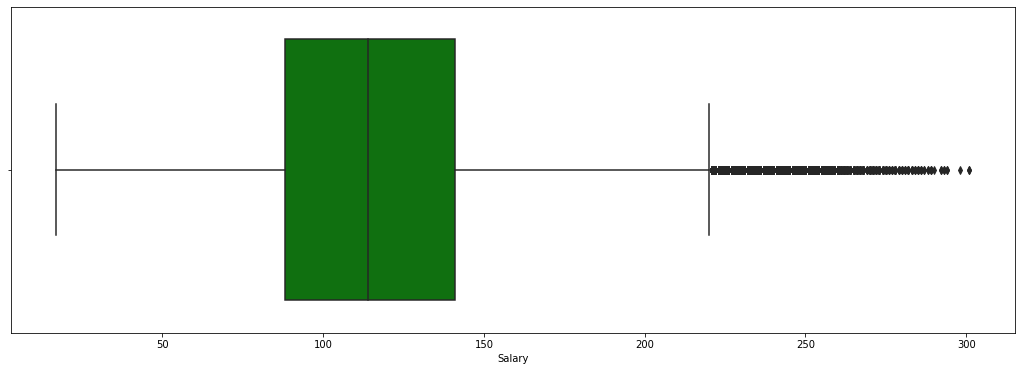

In [23]:
# BOX PLOT TO CHECK THE DIRECTION OF OUTLIER IN THE SPREAD

plt.figure(figsize=(18, 6))
sns.boxplot(train_merged['Salary'], color='green')
plt.show()

In [24]:
# OUTLIER FORMULA

q3 = train_merged['Salary'].quantile(.75)
q1 = train_merged['Salary'].quantile(.25)
iqr = q3 - q1
iqr

53.0

In [25]:
upperrange = q3 + 1.5*iqr
bottomrange = q1 - 1.5*iqr
bottomrange

8.5

In [26]:
# REMOVING OUTLIERS

train_merged = train_merged[(train_merged['Salary'] > bottomrange) & (train_merged['Salary'] < upperrange)]
train_merged

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience in Years,Miles from Metropolis,Salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


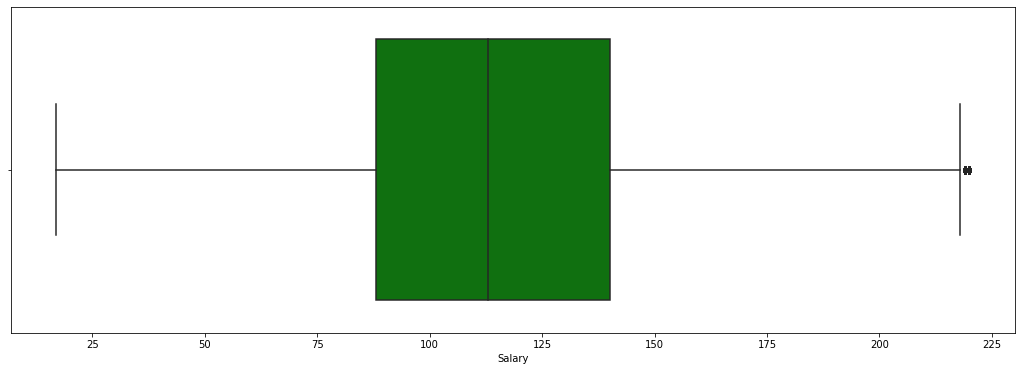

In [27]:
plt.figure(figsize=(18, 6))
sns.boxplot(train_merged['Salary'], color='green')
plt.show()

In [28]:
# CORRELATION ANALYSIS 

train_corr = train_merged.copy()

In [29]:
cols = ['Job Type', 'Degree', 'Major', 'Industry']
for i in cols:
    train_corr[i] = train_corr[i].astype('category')

In [30]:
train_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992878 entries, 0 to 999999
Data columns (total 9 columns):
Job ID                   992878 non-null object
Company ID               992878 non-null object
Job Type                 992878 non-null category
Degree                   992878 non-null category
Major                    992878 non-null category
Industry                 992878 non-null category
Experience in Years      992878 non-null int64
Miles from Metropolis    992878 non-null int64
Salary                   992878 non-null int64
dtypes: category(4), int64(3), object(2)
memory usage: 49.2+ MB


In [31]:
train_corr.columns

Index(['Job ID', 'Company ID', 'Job Type', 'Degree', 'Major', 'Industry',
       'Experience in Years', 'Miles from Metropolis', 'Salary'],
      dtype='object')

In [32]:
# DROPPING COLUMNS 'Job ID' & 'Company ID' AS IT HAS LESSER CORRELATION WITH THE TARGET VARIABLE 'SALARY'

train_corr = train_corr.drop('Job ID', axis = 1)
train_corr = train_corr.drop('Company ID', axis = 1)

In [33]:
train_corr

,Job Type,Degree,Major,Industry,Experience in Years,Miles from Metropolis,Salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [34]:
# ENCODING (ONE HOT ENCODE FOR CATEGORICAL DATA IN THE DATASET)

train_corr = pd.get_dummies(train_corr)
train_corr.head()
train_merged = train_corr

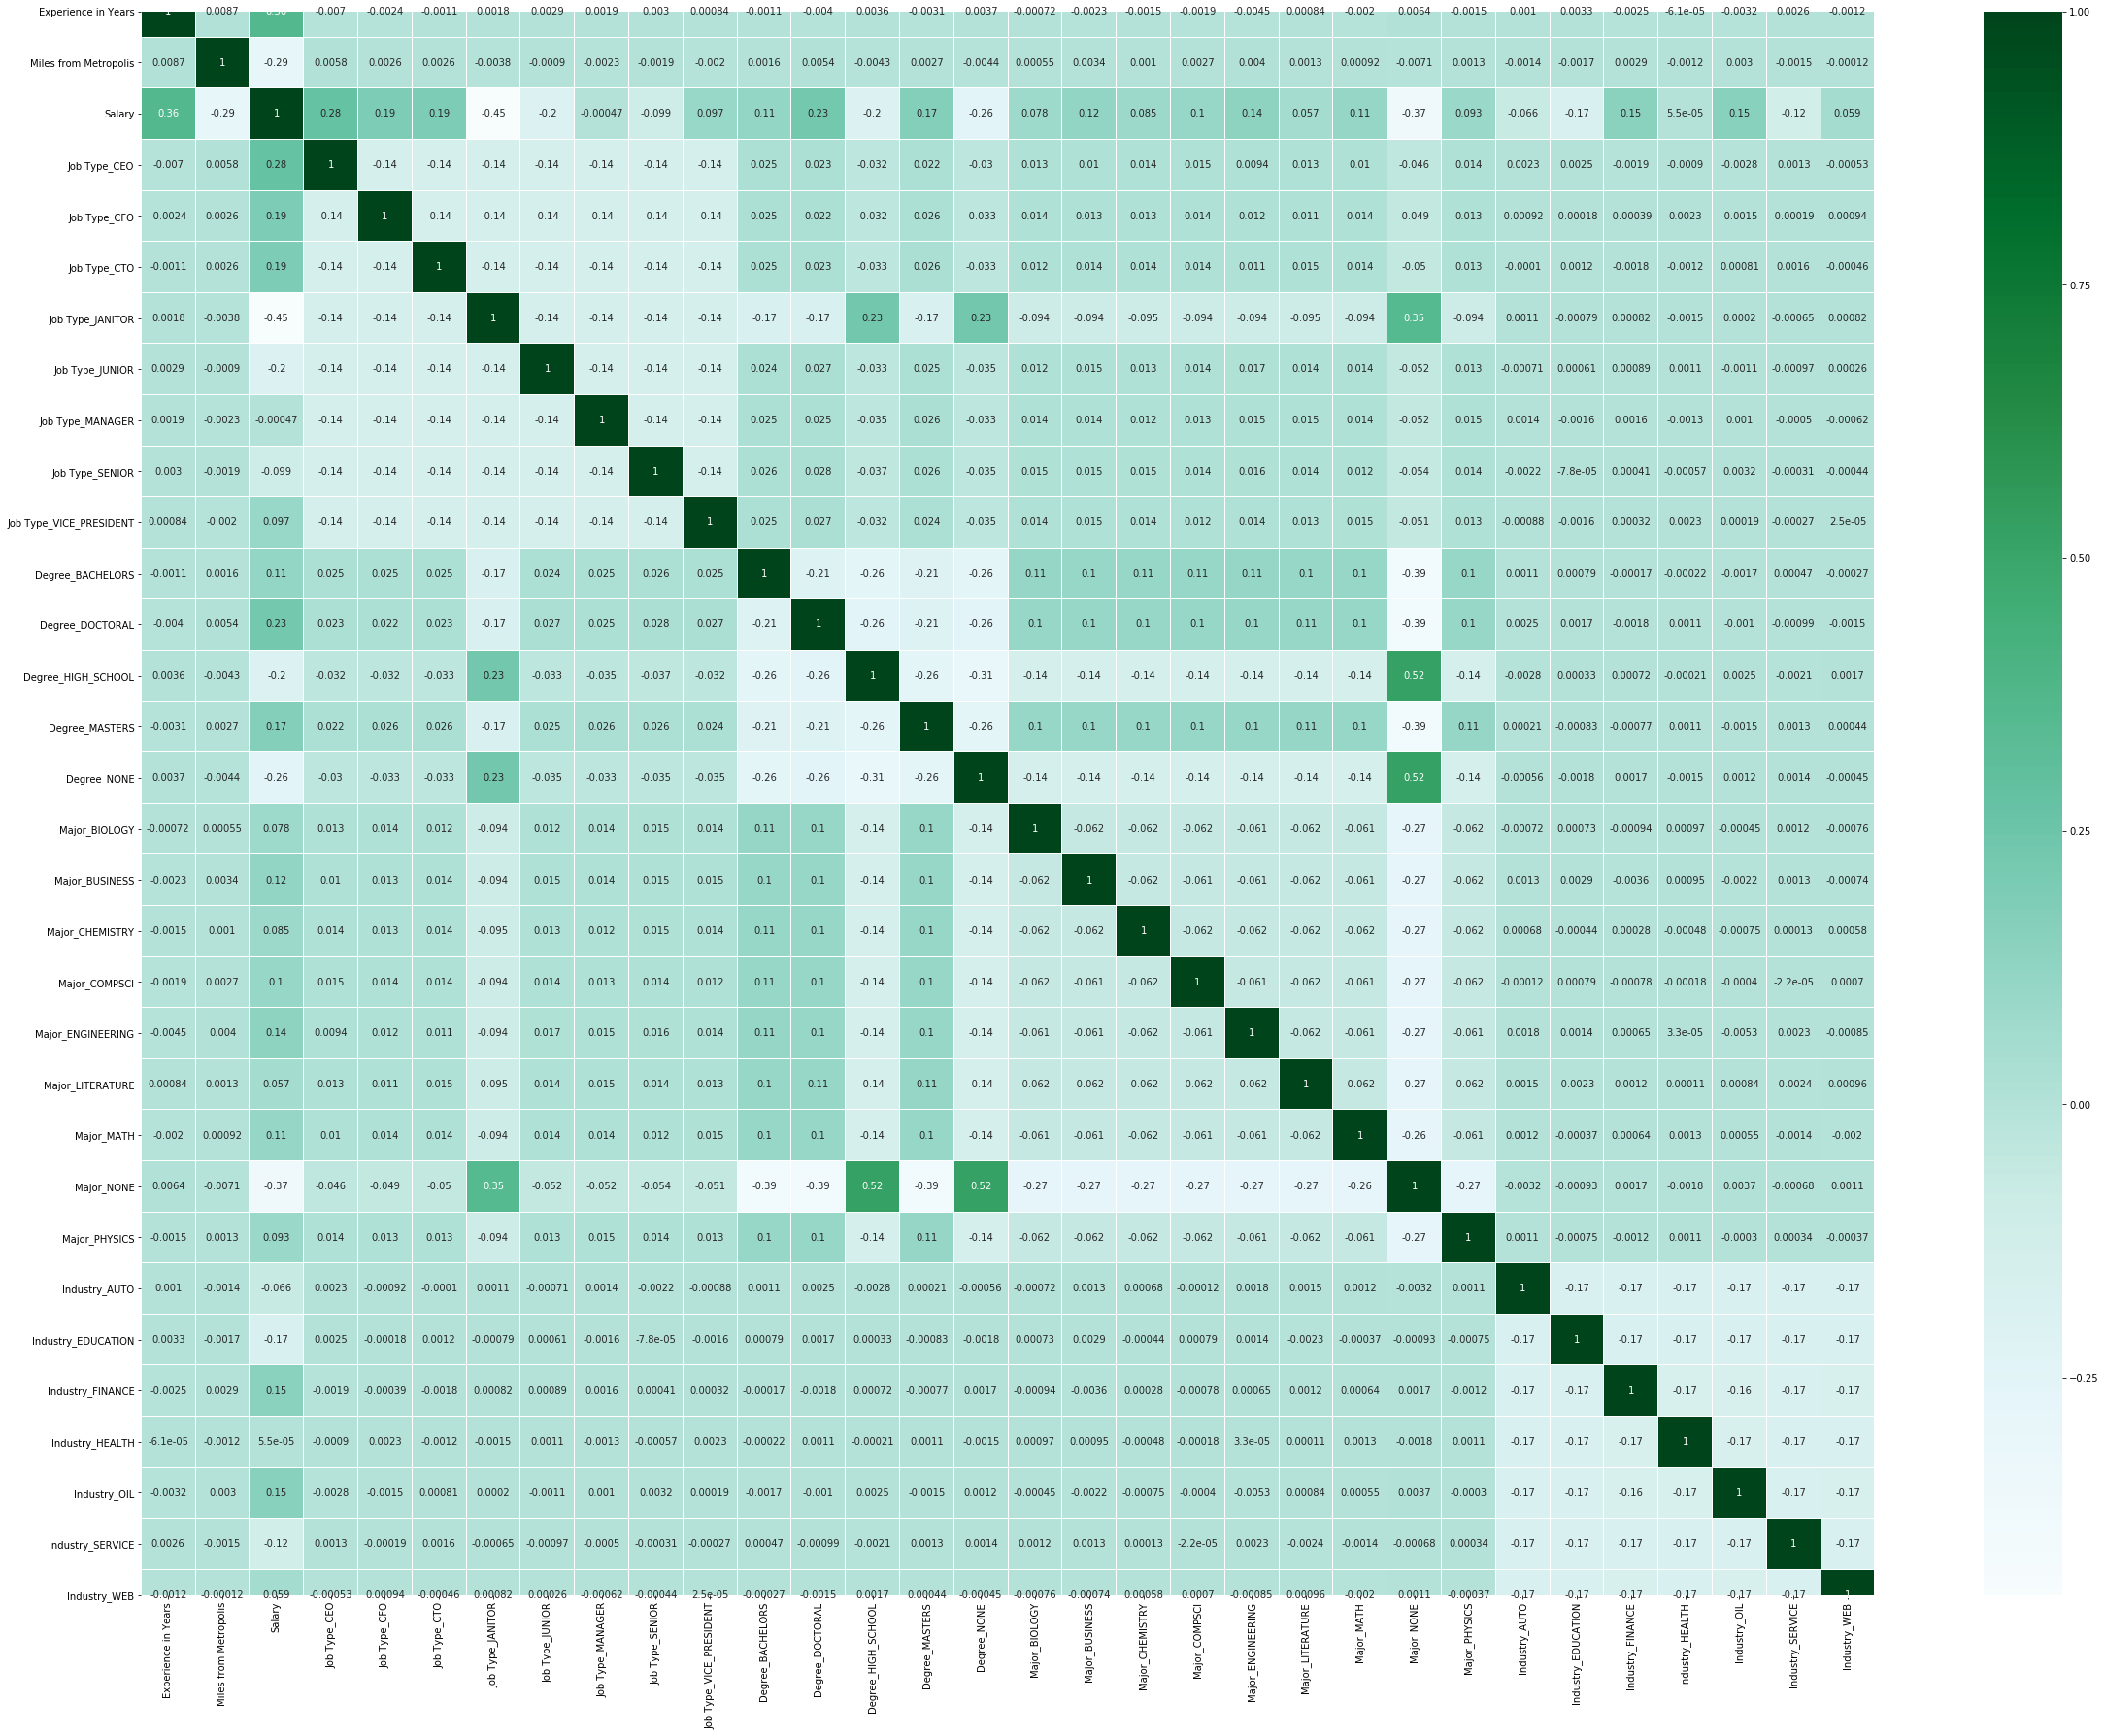

In [35]:
# CONFUSION MATRIX

plt.figure(figsize = (40, 30))
sns.heatmap(train_corr.corr(), cmap = 'BuGn', linewidth = 0.005, annot = True)

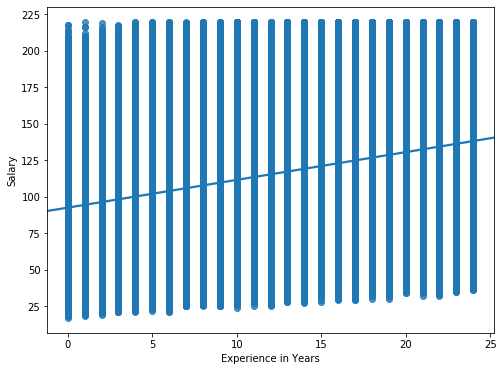

In [36]:
# CORRELATION BETWEEN EXPERIENCE AND SALARY USING REGRESSION PLOT

plt.figure(figsize=(8, 6))
sns.regplot(x="Experience in Years", y="Salary", data = train_merged)
plt.show()

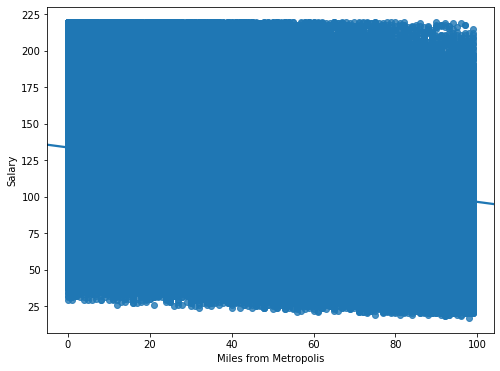

In [37]:
# CORRELATION BETWEEN SALARY AND MILES FROM METROPOLITAN USING REGRESSION PLOT

plt.figure(figsize=(8, 6))
sns.regplot(x="Miles from Metropolis", y="Salary", data = train_merged)
plt.show()

In [38]:
# IMPORT THE REQUIRED LIBRARIES FOR MACHINE LEARNING 

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib


C:\Users\kaust\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
# IN ORDER TO AVOID MODEL OVERFITTING DROP 'SALARY' COLUMN FROM TRAINING DATA

# DIVIDE DATA IN ATTRIBUTES AND LABELS 

x = train_merged.drop('Salary', axis = 1)

y = train_merged['Salary']

x.head()

,Experience in Years,Miles from Metropolis,Job Type_CEO,Job Type_CFO,Job Type_CTO,Job Type_JANITOR,Job Type_JUNIOR,Job Type_MANAGER,Job Type_SENIOR,Job Type_VICE_PRESIDENT,...,Major_MATH,Major_NONE,Major_PHYSICS,Industry_AUTO,Industry_EDUCATION,Industry_FINANCE,Industry_HEALTH,Industry_OIL,Industry_SERVICE,Industry_WEB
0,10,83,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [40]:
# SPLIT DATA - 80% - TRAINING, 20% - TESTING

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 40)

print('Number of training samples:', x_train.shape[0])
print('Number of testing samples:', x_test.shape[0])

Number of training samples: 794302
Number of testing samples: 198576


SIMPLE LINEAR REGRESSION MODEL 

In [41]:
# TRAINING ALGORITHM USING SIMPLE LINEAR REGRESSION 


lr = LinearRegression()

# FIT MODEL USING X & Y ATTRIBUTES

lr.fit(x_train, y_train)

# PREDICT VALUES (y_hat THAT GIVES AN ARRAY OF SALARY i.e. TARGET VARIABLE)

y_hat = lr.predict(x_test)
print("The first 5 predicted salaries:", y_hat[0:5])


The first 5 predicted salaries: [151.52720642  87.85456085 139.29048157  96.90325928  77.27108002]


In [42]:
# FIND INTERCEPT 'a' and SLOPE 'b'

print("The Slope is :", lr.coef_)
print("The Intercept is:", lr.intercept_)

The Slope is : [ 1.95248419e+00 -3.86963382e-01 -1.26506014e+10 -1.26506014e+10
 -1.26506014e+10 -1.26506015e+10 -1.26506015e+10 -1.26506015e+10
 -1.26506015e+10 -1.26506015e+10  1.05193944e+09  1.05193945e+09
  1.05193944e+09  1.05193945e+09  1.05193943e+09  1.12913178e+10
  1.12913178e+10  1.12913178e+10  1.12913178e+10  1.12913179e+10
  1.12913178e+10  1.12913178e+10  1.12913178e+10  1.12913178e+10
 -4.45771341e+10 -4.45771341e+10 -4.45771341e+10 -4.45771341e+10
 -4.45771341e+10 -4.45771341e+10 -4.45771341e+10]
The Intercept is: 44884478418.172104


In [43]:
# PREDICT SALARIES IN TEST SET

y_hat = lr.predict(x_test)
y_hat

array([151.52720642,  87.85456085, 139.29048157, ...,  74.7144928 ,
        41.88866425,  91.00886536])

EVALUATE MODEL ACCURACY USING METRICS MSE & R-squared

In [44]:
# METRICS USEFUL FOR ACCESSING ACCURACY OF SALARY ESTIMATES

mse = (mean_squared_error(y_test, y_hat))
print("The Root Mean Squared Error is:", np.sqrt(mse))

# R-squared

print('The R-square is:', lr.score(x,y))



The Root Mean Squared Error is: 19.2038342234051
The R-square is: 0.7389233794559382


In [45]:
# 5 cross validation 

rcross = cross_val_score(lr, x_train, y_train, cv = 5)
print("The K-cross validation accuracy is:", (rcross.mean(), rcross.std()))

The K-cross validation accuracy is: (0.7390318672987328, 0.00047327963159311804)


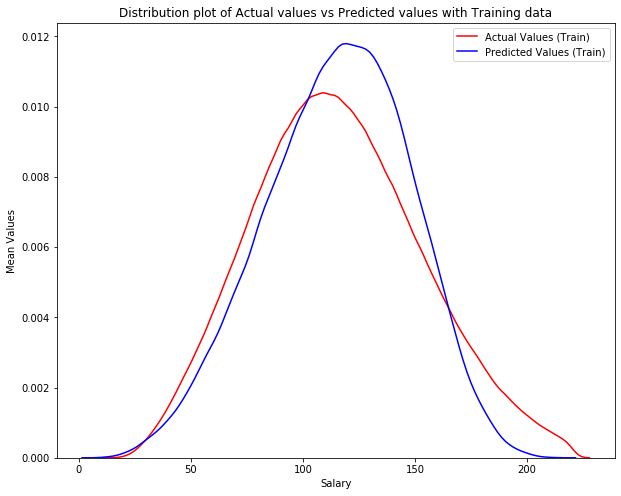

In [46]:
# DEFINING DISTRIBUTION PLOT 

# PLOT FOR TRAINING SET

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10 
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Salary')
    plt.ylabel('Mean Values')
    plt.show()
    plt.close()
    
Title = 'Distribution plot of Actual values vs Predicted values with Training data'
DistributionPlot(y_train, y_hat, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [47]:
# PREDICTING VALUES FOR TEST DATA

y_hat_test = lr.predict(x_test)
print("The first 5 salary predictions are: ", y_hat_test[0:5])

The first 5 salary predictions are:  [151.52720642  87.85456085 139.29048157  96.90325928  77.27108002]


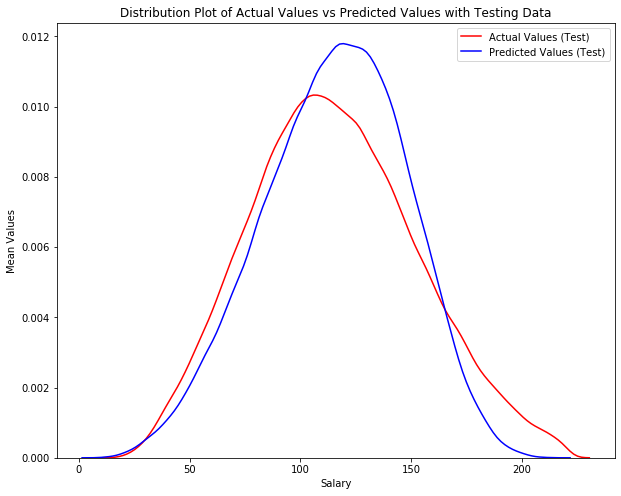

In [48]:
# DISTRIBUTION PLOT FOR TEST DATA

Title = 'Distribution Plot of Actual Values vs Predicted Values with Testing Data'
DistributionPlot(y_test, y_hat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

GRADIENT BOOSTING ALGORITHM 

In [49]:
# GRADIENT BOOSTING ALGORITHM 

gd = GradientBoostingRegressor(n_estimators = 60, max_depth = 5,
                              loss = 'ls', verbose = 5)

In [50]:
# FITTING THE MODEL 

gd.fit(x_train, y_train)
gd.score(x_test, y_test)

      Iter       Train Loss   Remaining Time 
         1        1267.8044            2.17m
         2        1154.3909            2.13m
         3        1059.8575            2.13m
         4         981.3243            2.09m
         5         915.5051            2.04m
         6         858.6721            2.00m
         7         810.3822            1.98m
         8         765.6448            1.94m
         9         726.5576            1.90m
        10         693.5657            1.85m
        11         664.0033            1.80m
        12         636.4024            1.76m
        13         613.4322            1.72m
        14         590.2472            1.68m
        15         570.4494            1.67m
        16         552.3472            1.62m
        17         535.2137            1.58m
        18         521.1591            1.55m
        19         507.6010            1.53m
        20         495.4995            1.50m
        21         484.8878            1.48m
        2

0.7464248183742579

In [51]:
# PREDICTING THE MSE VALUE FOR GRADIENT BOOSTING ALGORITHM 

gd_pred = gd.predict(x_test)
mean_squared_error(gd_pred, y_test)

357.4736434342693

POLYNOMIAL ALGORITHM

In [52]:
# POLYNOMIAL ALGORITHM 

p = PolynomialFeatures(2)

# FITTING THE MODEL 

x_train_p = p.fit_transform(x_train)
x_test_p = p.fit_transform(x_test)
print(p)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')


In [53]:
# POLYNOMIAL REGRESSION ON TRAINING DATA

poly = LinearRegression()
poly.fit(x_train_p, y_train)

# PREDICT SALARIES

y_hat_ptrain = poly.predict(x_train_p)
print("The first 5 salary predictions on training data are: ", y_hat_ptrain[0:5])

The first 5 salary predictions on training data are:  [154.23712367 126.4172109  101.69589385  43.38464281  89.70049811]


First 5 Predicted Training Values:  [154.23712367 126.4172109  101.69589385  43.38464281  89.70049811]
First 5 Actual Training Values:  [146 108  81  44 105]


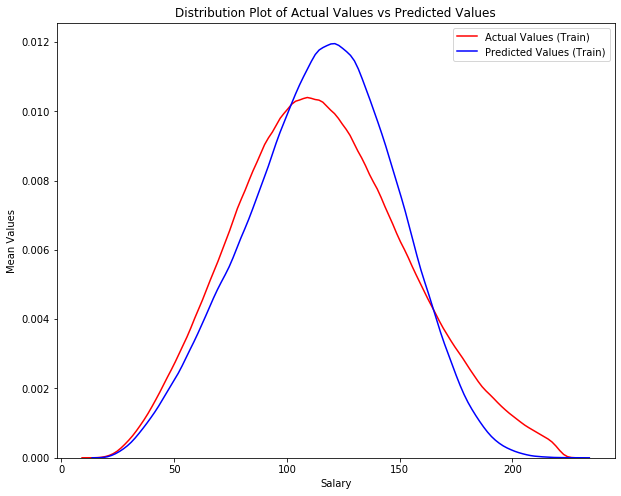

In [54]:
# PLOTTING DISTRIBUTION PLOT

print("First 5 Predicted Training Values: ", y_hat_ptrain[0:5])
print("First 5 Actual Training Values: ", y_train[0:5].values)

# COMPARING ACTUAL AND PREDICTED VALUES VIA DISTRIBUTION PLOT

Title = 'Distribution Plot of Actual Values vs Predicted Values'
DistributionPlot(y_train, y_hat_ptrain, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [55]:
# SIMILARY PREDICT VALUES FOR TEST DATA

y_hat_ptest = poly.predict(x_test_p)
print("The first 5 salary predictions are: ", y_hat_ptest[0:5])


The first 5 salary predictions are:  [165.99714858  89.84942343 135.26938961  83.91250684  74.84558395]


First 5 Predicted Test Values: [165.99714858  89.84942343 135.26938961  83.91250684  74.84558395]
First 5 Actual Test Values: [180 115 114  95  59]


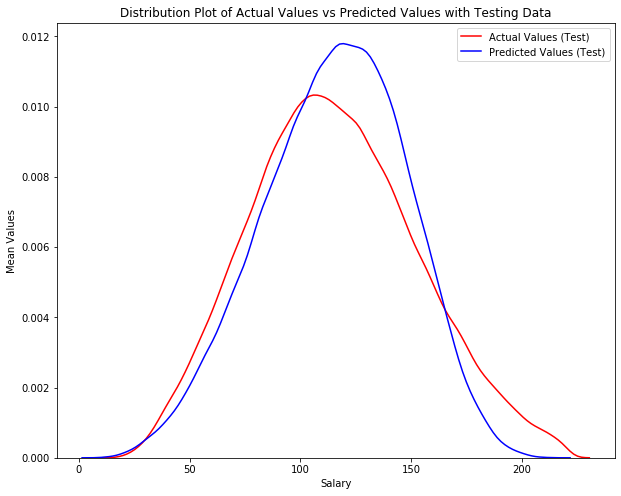

In [56]:
# PLOTTING DISTRIBUTION PLOT FOR TEST DATA

print("First 5 Predicted Test Values:", y_hat_ptest[0:5])
print("First 5 Actual Test Values:", y_test[0:5].values)

Title = 'Distribution Plot of Actual Values vs Predicted Values with Testing Data'
DistributionPlot(y_test, y_hat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [57]:
# CALCULATING MSE

print("MSE value for training data: ", mean_squared_error(y_train, y_hat_ptrain))
print("MSE value for test data: ", mean_squared_error(y_test, y_hat_ptest))

# EVALUATION WITH R^2 (METRIC FOR PREDICTING MODEL ACCURACY)

print('R-square value for training data: ', poly.score(x_train_p, y_train))
print('R-square value for test data: ', poly.score(x_test_p, y_test))

MSE value for training data:  340.5331462118713
MSE value for test data:  341.8830061858481
R-square value for training data:  0.7579225423664926
R-square value for test data:  0.7574840915389839


RANDOM FOREST 

In [58]:
# RANDOM FOREST MODEL

random_forest = RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           min_samples_split = 20, n_jobs = 2, 
                           max_features = 30)
print(random_forest)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=2,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)


In [59]:
# FITTING THE RANDOM FOREST MODEL 

random_forest.fit(x_train, y_train)
random_forest.score(x_train, y_train)

0.8132092707760931

In [60]:
# PREDICTING SALARIES FOR TRAIN DATA

y_hat_trainrandom_forest = random_forest.predict(x_train)
print("The first 5 salary predictions are: ", y_hat_trainrandom_forest[0:5])

The first 5 salary predictions are:  [144.32462346 124.79994547 103.91535325  44.50754496  93.29051154]


In [61]:
# PREDICTING SALARIES FOR TEST DATA

y_hat_testrandom_forest = random_forest.predict(x_test)
print("The first 5 salary predictions are: ", y_hat_testrandom_forest[0:5])

The first 5 salary predictions are:  [172.62746787  95.2054809  136.23360911  84.12141386  73.36113482]


In [62]:
# PREDICTED MSE VALUE

print("MSE value for train data:", mean_squared_error(y_test, y_hat_testrandom_forest))

print("R-square value for test data:", random_forest.score(x_test, y_test))

MSE value for train data: 361.63168412639914
R-square value for test data: 0.74347529763873


In [63]:
# CONCLUDING WHICH MODEL TO SELECT 

print("RMSE value for Simple Linear Regression: ", np.sqrt(mse).round(2))
print("RMSE value for Gradient Boosting Algorithm: ", np.sqrt(mean_squared_error(gd_pred, y_test)).round(2))
print("RMSE value for Polynomial Regression: ", np.sqrt(mean_squared_error(y_test, y_hat_ptest)).round(2))
print("RMSE value for Random Forest: ", np.sqrt(mean_squared_error(y_test, y_hat_testrandom_forest)).round(2))


RMSE value for Simple Linear Regression:  19.2
RMSE value for Gradient Boosting Algorithm:  18.91
RMSE value for Polynomial Regression:  18.49
RMSE value for Random Forest:  19.02


In [64]:
y_hat_testrandom_forest # CHECK 

array([172.62746787,  95.2054809 , 136.23360911, ...,  72.66808557,
        42.99067579,  96.87533312])

DEPLOY MODEL

In [65]:
# DEVELOPED PIPELINE

input = [('scale', StandardScaler()), ('transformation', PolynomialFeatures(include_bias = False)),
         ('model', LinearRegression())] #We do not need a bias column where all polynomial powers are 0
pipe = Pipeline(input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('transformation',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [66]:
# FITTING DATA

poly_model = pipe.fit(x,y)

In [67]:
# VIEW POLYNOMIAL MODEL

print(poly_model)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('transformation',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)


In [68]:
# PREDICTING VALUES FOR TEST DATA

y_hat_pipe = pipe.predict(x)
y_hat_pipe[0:5]

array([127.828125 , 117.484375 , 135.5625   , 121.2578125, 142.8203125])

In [69]:
print(y_hat_pipe)

[127.828125   117.484375   135.5625     ...  63.0390625  135.5546875
 113.08203125]


In [70]:
# CREATE FILE NAME

filename = 'test_salaries.csv'
joblib.dump(poly_model, filename)

['test_salaries.csv']

In [71]:
# LOADING THE CREATED MODEL

load_model = joblib.load(filename)

# RESULT FOR CREATED MODEL
result = load_model.score(x_test, y_test)
print(result)

0.7576320142377856


In [72]:
test_features_df.head()

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience in Years,Miles from Metropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [73]:
test_features_df = pd.DataFrame(test_features_df)

# CONVERT 'CATEGORICAL' DATA INTO 'CATEGORY' DATA TYPE
 

test_features_df[['Job Type', 'Degree', 
                     'Major', 'Industry']] = test_features_df[['Job Type', 
                                                           'Degree', 'Major', 'Industry']].astype('category')
print(test_features_df.dtypes) 


Job ID                     object
Company ID                 object
Job Type                 category
Degree                   category
Major                    category
Industry                 category
Experience in Years         int64
Miles from Metropolis       int64
dtype: object


In [74]:
cols = ['Job Type', 'Degree', 'Major', 'Industry']
for i in cols:
    test_features_df[i] = test_features_df[i].astype('category')
test_features_df = test_features_df.drop('Job ID', axis = 1)
test_features_df = test_features_df.drop('Company ID', axis = 1)

In [75]:
test_features_df.head()

,Job Type,Degree,Major,Industry,Experience in Years,Miles from Metropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [76]:
# ONE-HOT ENCODER

test_features_df = pd.get_dummies(test_features_df)

test_features_df.head()

,Experience in Years,Miles from Metropolis,Job Type_CEO,Job Type_CFO,Job Type_CTO,Job Type_JANITOR,Job Type_JUNIOR,Job Type_MANAGER,Job Type_SENIOR,Job Type_VICE_PRESIDENT,...,Major_MATH,Major_NONE,Major_PHYSICS,Industry_AUTO,Industry_EDUCATION,Industry_FINANCE,Industry_HEALTH,Industry_OIL,Industry_SERVICE,Industry_WEB
0,22,73,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,20,47,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,17,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,14,96,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,10,44,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
# CHECK FOR NULL VALUES

test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
Experience in Years        1000000 non-null int64
Miles from Metropolis      1000000 non-null int64
Job Type_CEO               1000000 non-null uint8
Job Type_CFO               1000000 non-null uint8
Job Type_CTO               1000000 non-null uint8
Job Type_JANITOR           1000000 non-null uint8
Job Type_JUNIOR            1000000 non-null uint8
Job Type_MANAGER           1000000 non-null uint8
Job Type_SENIOR            1000000 non-null uint8
Job Type_VICE_PRESIDENT    1000000 non-null uint8
Degree_BACHELORS           1000000 non-null uint8
Degree_DOCTORAL            1000000 non-null uint8
Degree_HIGH_SCHOOL         1000000 non-null uint8
Degree_MASTERS             1000000 non-null uint8
Degree_NONE                1000000 non-null uint8
Major_BIOLOGY              1000000 non-null uint8
Major_BUSINESS             1000000 non-null uint8
Major_CHEMISTRY            1000000 non

In [78]:
predictions = poly_model.predict(test_features_df) # CHECK 


In [79]:
predictions_df = pd.DataFrame(predictions) # CHECK 


In [80]:
# ROUNDING OFF THE PREDICTED SALARIES

predictions_df = predictions_df.round()

In [81]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 1 columns):
0    1000000 non-null float64
dtypes: float64(1)
memory usage: 7.6 MB


In [82]:
test_features = pd.read_csv('test_features.csv')
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [83]:
# MERGE DATA

test_salaries = pd.concat([test_features['jobId'], predictions_df], axis=1, ignore_index=True)

In [84]:
test_salaries.rename(columns = {0:'Job ID', 1:'Salary'}, inplace = True)

In [85]:
test_salaries.head()

,Job ID,Salary
0,JOB1362685407687,112.0
1,JOB1362685407688,93.0
2,JOB1362685407689,181.0
3,JOB1362685407690,104.0
4,JOB1362685407691,116.0


In [86]:
test_salaries.to_csv('test_salaries.csv', index=False) #DROP INDEX


In [87]:
test_features.rename(columns = {'jobId':'Job ID', 'companyId':'Company ID', 'jobType':'Job Type', 'degree':'Degree', 'major':'Major', 'industry':'Industry', 'yearsExperience':'Experience in Years', 'milesFromMetropolis':'Miles from Metropolis'}, inplace = True)

In [88]:
test_merged = pd.merge(test_features, test_salaries, on = 'Job ID', how = 'inner')

In [89]:
test_merged.head() #CHECK

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience in Years,Miles from Metropolis,Salary
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,112.0
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,93.0
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,181.0
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,104.0
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,116.0
